In [8]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress = True)
from importlib import reload
import functions, arithmetic, circuits
from functions import *
from arithmetic import *
from circuits import *

functions = reload(functions)
arithmetic = reload(arithmetic)
circuits = reload(circuits)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
b = 3
qasm_qc = QuantumCircuit(b, b)
QFT(qasm_qc, b, delta=8)
qasm_output = qasm_qc.qasm()

In [10]:
with open("qasm_files/qasm{}qubit".format(b), 'w') as txt_file:
    txt_file.write(qasm_output)

In [11]:
n_low = 2
n_high = 32
compareFTs(n_low, n_high, backend="statevector", display_bool=False)

errors2-32.txt


FileNotFoundError: [Errno 2] No such file or directory: 'txt/errors2-32.txt'

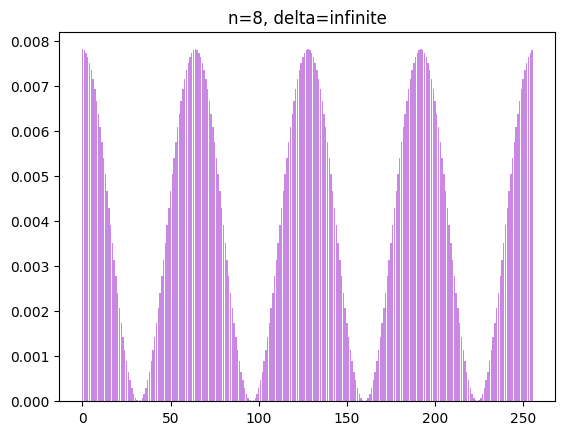

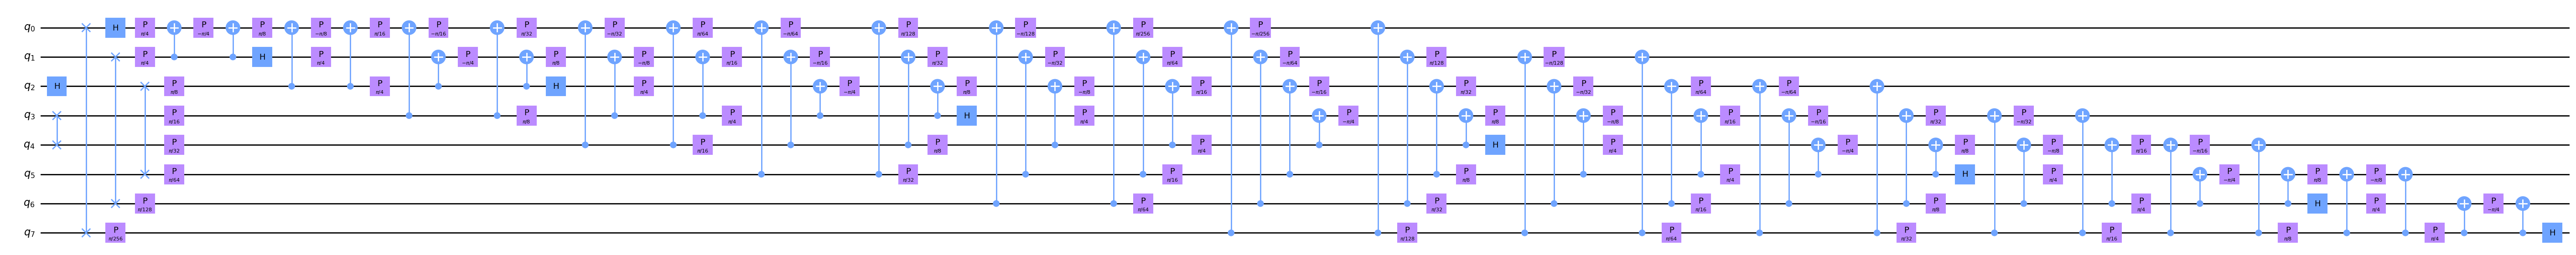

<Figure size 640x480 with 0 Axes>

In [12]:
n = 8
ac = QuantumCircuit(n)
ac.h(2)
QFT(ac, n)

probs = simulateQFT(ac, n, display_bool=True)

ac.draw(output="mpl", fold=-1)

In [8]:
plotErrorsFromFile("txt/errors2-32.txt")

FileNotFoundError: txt/errors2-32.txt not found.

87: 100.0%
operation count: 370
operations: {'cx': 156, 'u1': 154, 'u2': 44, 'u': 7, 'measure': 7, 'barrier': 2}


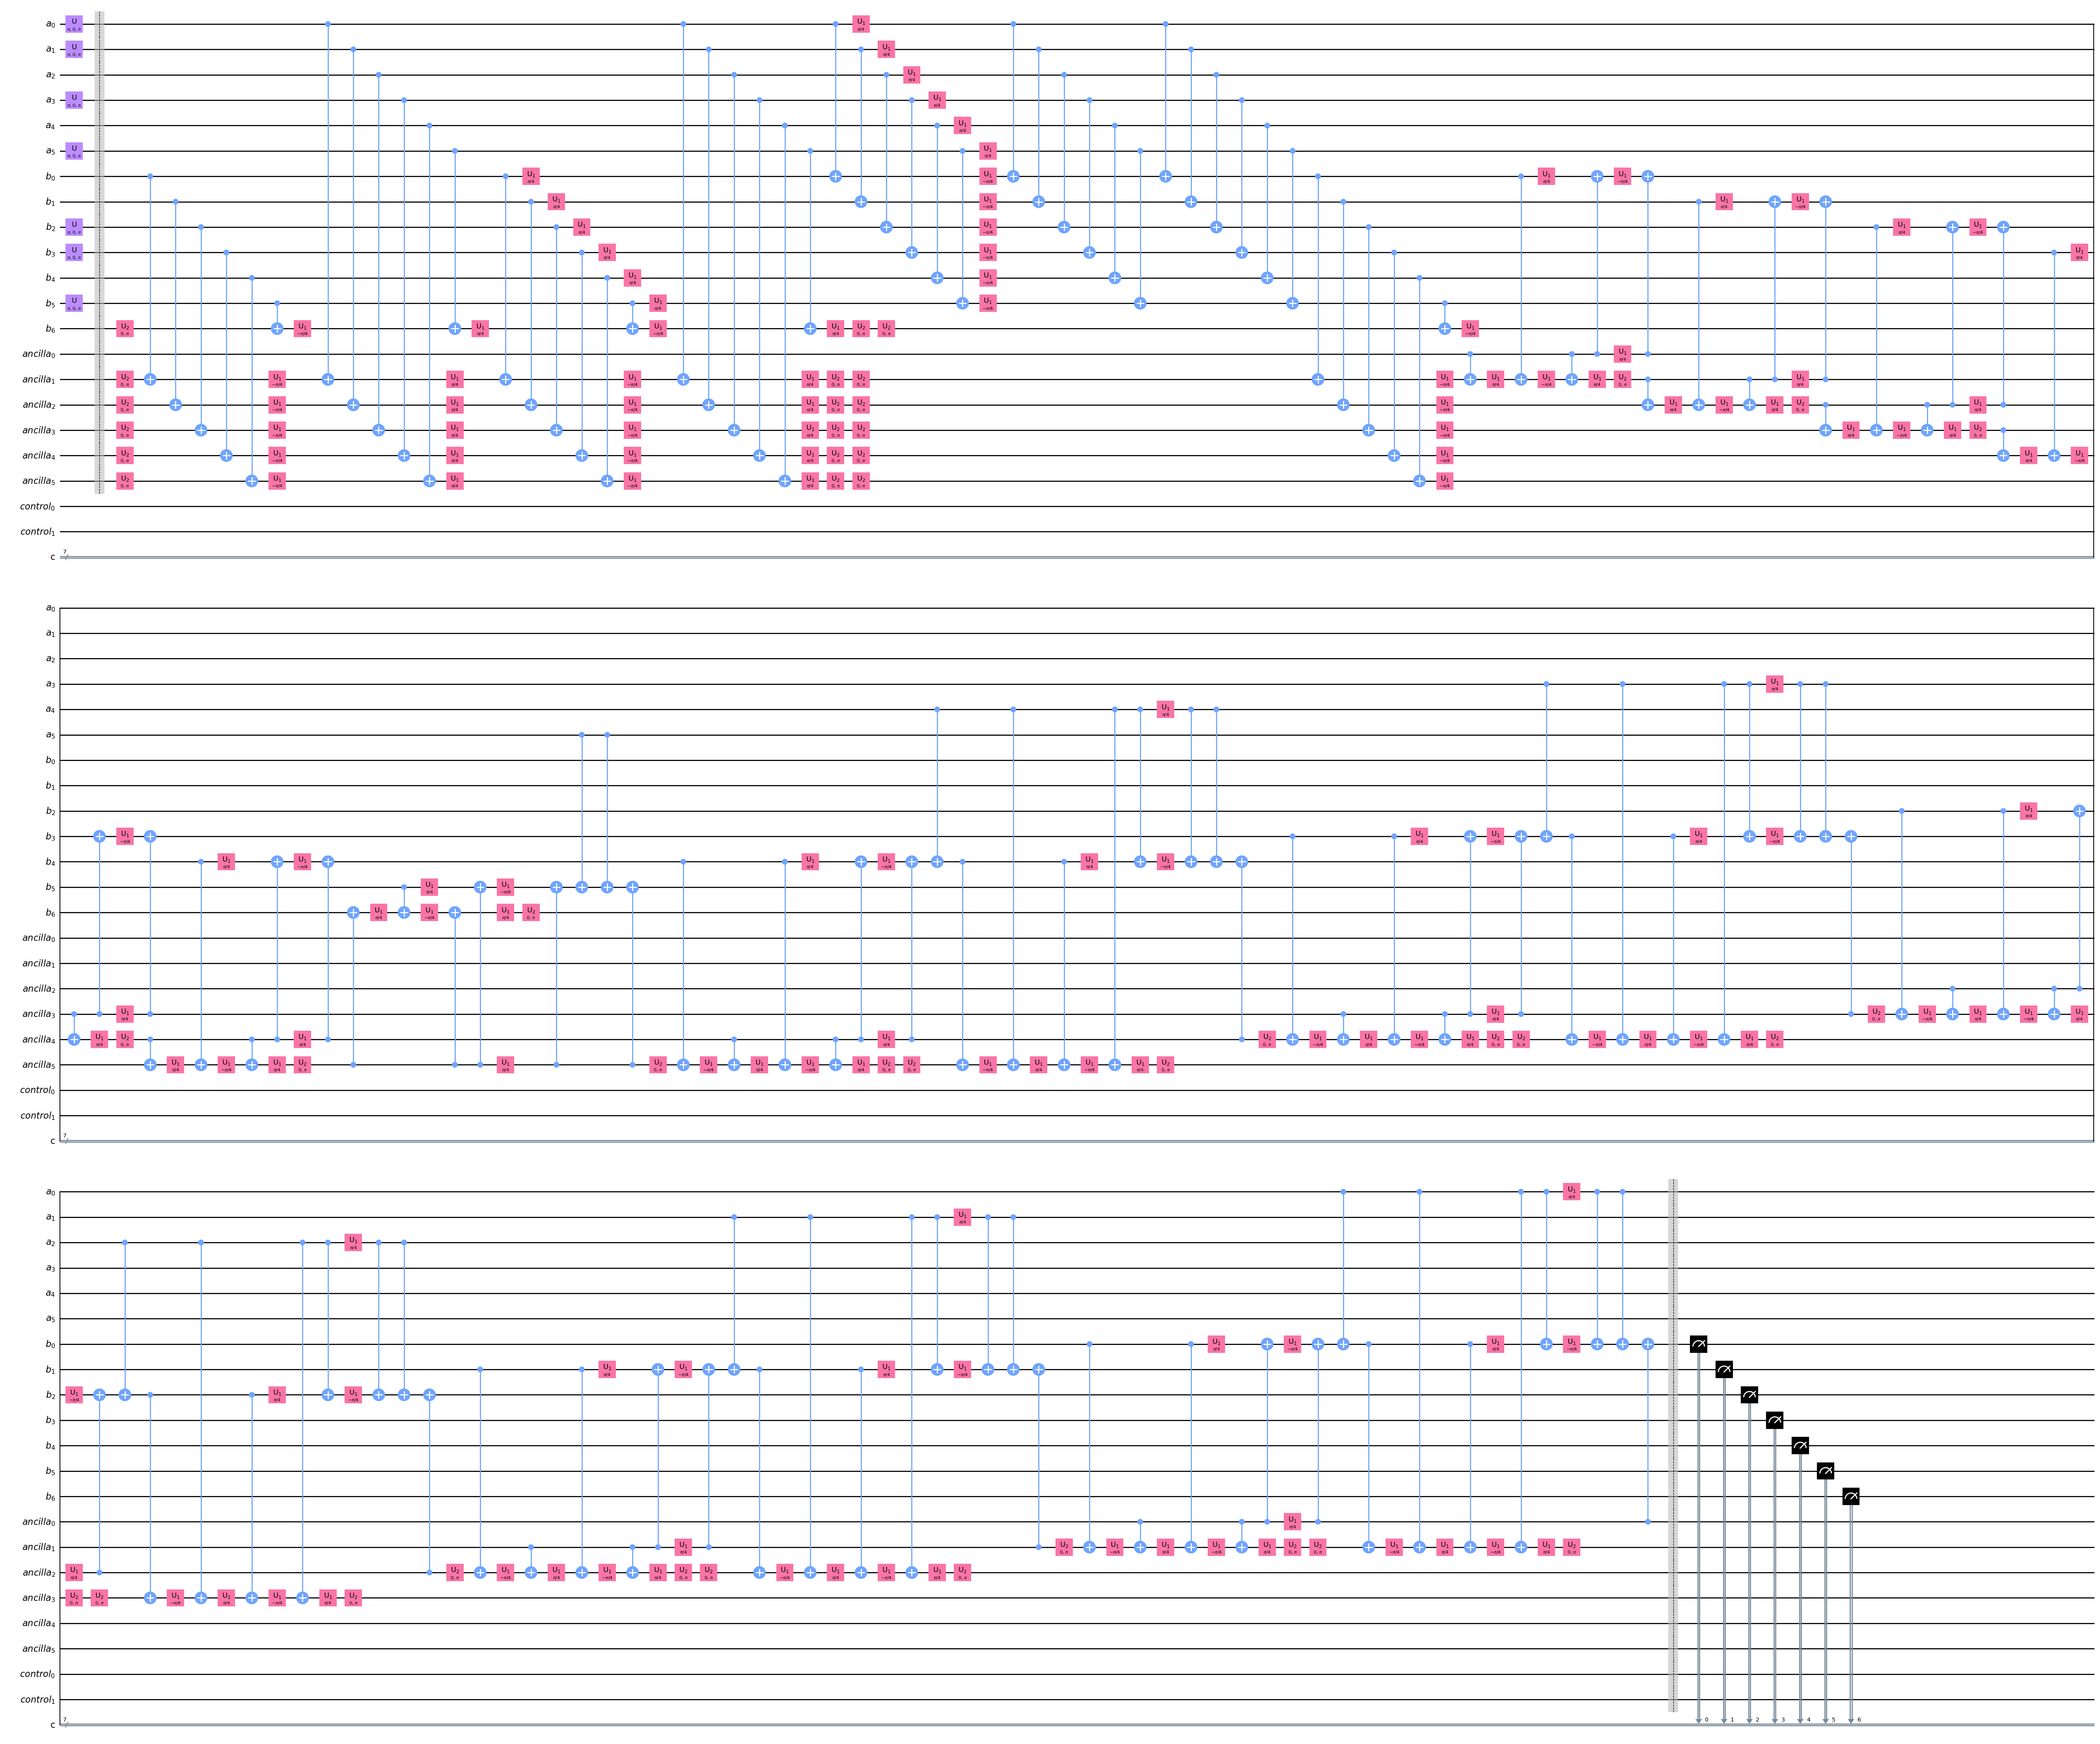

In [9]:
# n-bit adder
from qiskit import QuantumRegister, ClassicalRegister

# addends
a = 43
b = 44

reverse_bool = False
qc = adderCircuit(a, b, reverse_bool)
simulate(qc, 1024)
drawDecomposed(qc, len(bin(max(a, b))[2:]), reverse_bool)

In [10]:
a = 29
b = 27
N = 28

reverse_bool = False
qc = modNAdderCircuit(a, b, N, reverse_bool)

simulate(qc)
# drawDecomposed(qc, len(bin(max(a, b))[2:]), reversed=reverse_bool)

28: 100.0%


In [6]:
# g^x mod N
x = 3
g = 7
N = 14

qc = modNMultiplierCircuit(x, g, N)
simulate(qc)
drawDecomposed(qc, len(bin(max(x, g))[2:]))

a = 7, binMod = 0111
a = 14, binMod = 0000
a = 28, binMod = 0000
a = 56, binMod = 0000
7: 100.0%
operation count: 944
operations: {'cx': 508, 'ccx': 280, 'u3': 90, 'barrier': 43, 'u': 19, 'measure': 4}


In [13]:
x = 7
g = 7
N = 13

qc = modNMultiplierCircuit(x, g, N)

import time
start = time.time()
simulateGPU(qc)
print(f"GPU = {time.time() - start}s")

start = time.time()
simulate(qc)
print(f"CPU = {time.time() - start}s")

drawDecomposed(qc, len(bin(max(x, g))[2:]))

a = 7, binMod = 0111
a = 14, binMod = 0001
a = 28, binMod = 0010
a = 56, binMod = 0100


Simulation failed and returned the following error message:
ERROR: Failed to load qobj: Simulation device "GPU" does not support cuStateVec on this system


QiskitError: 'Data for experiment "circuit-8859" could not be found.'

a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 16, binMod = 0001
a = 8, binMod = 1000
a = 16, binMod = 0001
a = 32, binMod = 0010
a = 64, binMod = 0100
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 16, binMod = 0001
a = 32, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 16, binMod = 0001
a = 32, binMod = 0010
a = 1, binMod = 0001
a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 1, binMod = 0001
a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 1, binMod = 0001
a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 1, binMod = 0001
a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
000000000000000000000000000
000000000000000000000000001
000000000000000000000000010
000000000000000000000000011
000000000000000000000000100
000000000000000000000000101
000000000000000000000000110
000000000000000000000000111
000000000000000000000001000
000000000000000000000001001
000000000000000000000001010
000000000000

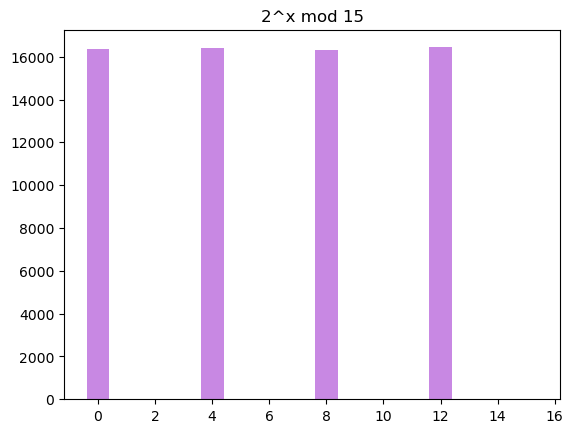

<Figure size 640x480 with 0 Axes>

In [80]:
# modular exponentiation mod N
n = 4
len_exp = n
no_qubits = len_exp + 5 * n + 3

reg_exp = QuantumRegister(len_exp, name = "reg_exp")
reg_c_qubit = QuantumRegister(1, name="reg_control")
reg_x = QuantumRegister(n, name="reg_x")
reg_a = QuantumRegister(n, name="reg_a")
reg_b = QuantumRegister(n + 1, name="reg_b")
reg_anc = QuantumRegister(n, name="reg_anc")
reg_N = QuantumRegister(n, name="reg_modN")
reg_tmp_qubit = QuantumRegister(1, name="reg_tmp_qubit")
cr = ClassicalRegister(no_qubits, name="reg_output")

g = 2

# use numpy nonzero to convert N into gates
N = 15

qc = QuantumCircuit(reg_exp, reg_c_qubit, reg_x, reg_a, reg_b, reg_anc, reg_N, reg_tmp_qubit, cr)

qc.h(reg_exp[i] for i in range(len_exp))
qc.x(reg_N[i] for i in [0,1,2,3])
qc.x(reg_x[0])

qc.append(nbitModExponentiation(n, g, N, reg_exp, reg_c_qubit, reg_x, reg_a, reg_b, reg_anc, reg_N, reg_tmp_qubit), reg_exp[0:len_exp] + reg_c_qubit[0:1] + reg_x[0:n] + reg_a[0:n] + reg_b[0:n + 1] + reg_anc[0:n] + reg_N[0:n] + reg_tmp_qubit[0:1])

qc.append(nbitQFT(len_exp, reg_exp, reversed=True), reg_exp[0:len_exp])

qc.measure(reg_exp[0:len_exp], cr[0:len_exp])
#
simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=2**16)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

plotShor(no_qubits, len_exp, counts, g, N)

# reps = 5
# qc.decompose(reps=reps).draw(output="mpl", fold=-1, scale=1, filename="circuits/{}-bitModNExponentiation{}".format(n, "(decomposed)" if reps > 0 else ""))

In [25]:
reps = 5
qasm_output = qc.decompose(reps=reps).qasm()
with open("qasm_files/ShorsAlg(N={}, g={},reps={})".format(N, g, reps), 'w') as txt_file:
    txt_file.write(qasm_output)

# qc.decompose(reps=reps).draw(output="mpl", fold=-1, scale=1, filename="circuits/{}-bitModNExponentiation{}".format(n, "(decomposed)" if reps > 0 else ""))

In [3]:
from winsound import Beep
reps = 5
qc.decompose(reps=reps).draw(output="mpl", fold=400, scale=0.4, plot_barriers=False, filename="circuits/{}-bitMod{}Exponentiation{}".format(n, N,"(decomposed)" if reps > 0 else ""))

Beep(200, 1000)